The goal of this notebook is to try and merge wait time data and hiring data....good luck.

Eventually, I want to make some scatter plots with wait time versus hiring to see answer two questions:

Did the hires go to the places with the longer wait times?

Did the hires reduce wait times where they went?

In [2]:
import pandas as pd
import re
import numpy as np
from scipy import stats

In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

I'm going to need to merge these two data sets and for that I need to extract the VISN and station out from the 

In [4]:


def get_VISN(new_string):
    try:
        query = r"^\(V(\d\d)\) \((\d\d\d)"
        m = re.search(query, new_string)
        return m.group(1)
    except:
        None

def get_facility(new_string):
    try:
        query = r"^\((V\d\d)\) \((\d\d\d)"
        m = re.search(query, new_string)
        return m.group(2)
    except:
        None

def get_station(new_list):
    container = []
    return_list = []
    for item in new_list:
        if item in container:
            return_list.append(False)
        else:
            container.append(item)
            return_list.append(True)
    return return_list

def make_int(number):
    number = number.replace(",","")
    return int(number)

#### Reading in Data

In [5]:
W_T = pd.read_csv("Wait_Time/Pending_Clean/2016_Wait.csv") #October 2016
Hiring = pd.read_csv("Hiring/Choice VA Hiring - #4 - Choice Act Hires -Fac List.csv")

In [323]:
W_T.head()

,Location,Appts_Total_2016,PC_Wait_2016,Appts<31_16,%Appts<31_16
0,"(V01) (402) Togus, ME","43,609",7.82,"41,785",0.96
1,(V01) (402) Togus VAMC,"27,551",9.00,"26,216",0.95
2,(V01) (402GA) Aroostook County\r(Caribou),"1,081",16.27,965,0.89
3,(V01) (402GB) Calais,282,5.45,277,0.98
4,(V01) (402GC) Rumford,562,1.52,562,1.00


#### Applying my functions to the data

In [324]:
W_T["VISN"] = W_T["Location"].apply(get_VISN)
W_T["Facility"] = W_T["Location"].apply(get_facility)

There's on big problem I have to solve here - I need to remove the individual facilities from the list. 
To do this, I'm only going to keep the rows that have the highest value for their station.

Or....

I could keep the first instance of every station.

#### This makes sure it is the first instance of the station

In [325]:
W_T["Is_Station"] = get_station(W_T["Facility"])

In [326]:
W_T_Stations = W_T[W_T["Is_Station"] == True]

#### Creating a pivot table to add up the number of employees for each station

In [327]:
hiring_summed = pd.pivot_table(Hiring,index=["Station"],values=["NbrEmps"],aggfunc=np.sum)
hiring_summed = hiring_summed.reset_index()

#### adding a 'station' column for easier merging

In [328]:
W_T_Stations["Station"] = W_T_Stations["Facility"]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


#### Actually merging (wo-ho!)

In [329]:
merged_df = W_T_Stations.merge(hiring_summed, on="Station")
merged_df

,Location,Appts_Total_2016,PC_Wait_2016,Appts<31_16,%Appts<31_16,VISN,Facility,Is_Station,Station,NbrEmps
0,"(V01) (402) Togus, ME","43,609",7.82,"41,785",0.96,01,402,True,402,23
1,"(V01) (405) White River Junction, VT","21,091",6.09,"20,284",0.96,01,405,True,405,24
2,"(V01) (518) Bedford, MA","14,456",0.60,"13,366",0.92,01,518,True,518,5
3,"(V01) (523) VA Boston HCS, MA","84,373",14.46,"80,635",0.96,01,523,True,523,28
4,"(V01) (608) Manchester, NH","25,424",5.75,"24,384",0.96,01,608,True,608,19
5,(V01) (631) VA Central Western Massachusetts\rHCS,"28,207",7.88,"26,256",0.93,01,631,True,631,15
6,"(V01) (650) Providence, RI","55,615",7.00,"53,872",0.97,01,650,True,650,39
7,"(V01) (689) VA Connecticut HCS, CT","55,207",1.96,"53,335",0.97,01,689,True,689,18
8,"(V02) (528) Albany, NY","41,366",5.72,"38,275",0.93,02,528,True,528,13
9,"(V03) (526) Bronx, NY","31,772",5.04,"31,241",0.98,03,526,True,526,22


Eureka! It merged! However, I do need to be careful and go back and inspect this data. There were a few stations in the hiring data with letters attached so I need to make sure it's okay to have lost them. Also, need to confirm that these should be joined this way.

In [330]:
merged_df.columns

Index([u'Location', u'Appts_Total_2016', u'PC_Wait_2016', u'Appts<31_16',
       u'%Appts<31_16', u'VISN', u'Facility', u'Is_Station', u'Station',
       u'NbrEmps'],
      dtype='object')

### What I still need to do

Add in the employee count numbers. This will help me see how many more employees were added versus the size of the facility. Having the percent increase should work better on the X axis than just using number of employees.

Add in the 2014 wait times. This is neccesary to see how wait times have changed. 

Create a column marking how it has changed, perhaps an additional column for percent change. Then we can really see how things compare. 

### Adding in onboard information

In [331]:
staff = pd.read_csv("Staff_Size/Onboard_By_statyion_By_FY.csv")
staff.head()

,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,MAY-FY14,MAY-FY15,MAY-FY16
0,VHA,268699,272538.0,283338,294444,307430,318560
1,VHACO,10444,12947.0,14778,16194,17840,18438
2,(V01) (402) HCS TOGUS ME,1293,1272.0,1248,1283,1335,1446
3,(V01) (405) MROC WHT RIVER JCT VT,852,853.0,881,921,1022,1177
4,(V01) (478) V1HCSBEDFORD MA,30,36.0,34,53,48,42


In [332]:
staff["Station"] = staff["ORGANIZATION"].apply(get_facility)

In [333]:
staff.head()

,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,MAY-FY14,MAY-FY15,MAY-FY16,Station
0,VHA,268699,272538.0,283338,294444,307430,318560,None
1,VHACO,10444,12947.0,14778,16194,17840,18438,None
2,(V01) (402) HCS TOGUS ME,1293,1272.0,1248,1283,1335,1446,402
3,(V01) (405) MROC WHT RIVER JCT VT,852,853.0,881,921,1022,1177,405
4,(V01) (478) V1HCSBEDFORD MA,30,36.0,34,53,48,42,478


In [334]:
merged_df = merged_df.merge(staff, on="Station")

In [335]:
merged_df.head()

,Location,Appts_Total_2016,PC_Wait_2016,Appts<31_16,%Appts<31_16,VISN,Facility,Is_Station,Station,NbrEmps,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,MAY-FY14,MAY-FY15,MAY-FY16
0,"(V01) (402) Togus, ME","43,609",7.82,"41,785",0.96,01,402,True,402,23,(V01) (402) HCS TOGUS ME,1293,1272.0,1248,1283,1335,1446
1,"(V01) (405) White River Junction, VT","21,091",6.09,"20,284",0.96,01,405,True,405,24,(V01) (405) MROC WHT RIVER JCT VT,852,853.0,881,921,1022,1177
2,"(V01) (518) Bedford, MA","14,456",0.60,"13,366",0.92,01,518,True,518,5,(V01) (518) MC BEDFORD MA,1313,1265.0,1245,1251,1297,1352
3,"(V01) (523) VA Boston HCS, MA","84,373",14.46,"80,635",0.96,01,523,True,523,28,(V01) (523) HCS BOSTON MA,4022,4011.0,4041,4032,4123,4303
4,"(V01) (608) Manchester, NH","25,424",5.75,"24,384",0.96,01,608,True,608,19,(V01) (608) MC MANCHESTER NH,663,683.0,691,686,759,803


In [336]:
merged_df["percent_of_staff_14"] = merged_df["NbrEmps"]/merged_df["MAY-FY14"]

In [337]:
merged_df

,Location,Appts_Total_2016,PC_Wait_2016,Appts<31_16,%Appts<31_16,VISN,Facility,Is_Station,Station,NbrEmps,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,MAY-FY14,MAY-FY15,MAY-FY16,percent_of_staff_14
0,"(V01) (402) Togus, ME","43,609",7.82,"41,785",0.96,01,402,True,402,23,(V01) (402) HCS TOGUS ME,1293,1272.0,1248,1283,1335,1446,0.017927
1,"(V01) (405) White River Junction, VT","21,091",6.09,"20,284",0.96,01,405,True,405,24,(V01) (405) MROC WHT RIVER JCT VT,852,853.0,881,921,1022,1177,0.026059
2,"(V01) (518) Bedford, MA","14,456",0.60,"13,366",0.92,01,518,True,518,5,(V01) (518) MC BEDFORD MA,1313,1265.0,1245,1251,1297,1352,0.003997
3,"(V01) (523) VA Boston HCS, MA","84,373",14.46,"80,635",0.96,01,523,True,523,28,(V01) (523) HCS BOSTON MA,4022,4011.0,4041,4032,4123,4303,0.006944
4,"(V01) (608) Manchester, NH","25,424",5.75,"24,384",0.96,01,608,True,608,19,(V01) (608) MC MANCHESTER NH,663,683.0,691,686,759,803,0.027697
5,(V01) (631) VA Central Western Massachusetts\rHCS,"28,207",7.88,"26,256",0.93,01,631,True,631,15,(V01) (631) MC NORTHAMPTON MA,639,726.0,767,795,803,876,0.018868
6,"(V01) (650) Providence, RI","55,615",7.00,"53,872",0.97,01,650,True,650,39,(V01) (650) MC PROVIDENCE RI,1215,1262.0,1279,1342,1406,1474,0.029061
7,"(V01) (689) VA Connecticut HCS, CT","55,207",1.96,"53,335",0.97,01,689,True,689,18,(V01) (689) HCS WEST HAVEN CT,2477,2541.0,2623,2812,2926,2972,0.006401
8,"(V02) (528) Albany, NY","41,366",5.72,"38,275",0.93,02,528,True,528,13,(V02) (528) HCS BUFFALO NY,6584,6624.0,6566,6678,6751,6735,0.001947
9,"(V03) (526) Bronx, NY","31,772",5.04,"31,241",0.98,03,526,True,526,22,(V03) (526) MC BRONX NY,1898,1819.0,1756,1777,1827,1892,0.012380


KeyError: 'PC_Wait_2014'

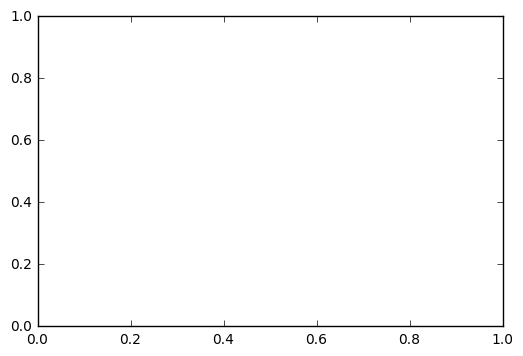

In [338]:
ax = merged_df.plot(kind ='scatter',x='percent_of_staff_14', y ="PC_Wait_2014")
#ax.set_title("Comparing the percent of new staff added against 2014 wait times")
ax.set_ylabel("2014 Primary Care Wait Times")
ax.set_xlabel("Percent Of Staff Increases From Choice Act Hires")

In [265]:
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df["percent_of_staff_14"],merged_df["PC_Wait_2014"])
r_value**2

0.082316954668935446

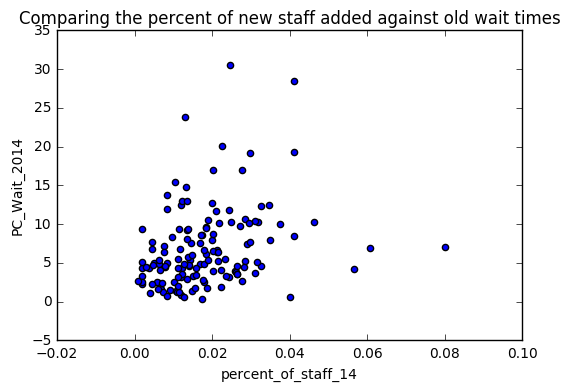

In [208]:
ax = merged_df.plot(kind ='scatter',x='percent_of_staff_14', y ="PC_Wait_2014")
ax.set_title("Comparing the percent of new staff added against old wait times")

In [302]:
merged_df[(merged_df["percent_of_staff_14"] > .07)]["Appts_Total_2016"]

102    10575
Name: Appts_Total_2016, dtype: int64

In [303]:
merged_df["NbrEmps"].describe()

count    139.000000
mean      37.316547
std       27.764025
min        2.000000
25%       19.000000
50%       29.000000
75%       48.000000
max      127.000000
Name: NbrEmps, dtype: float64

In [297]:
merged_df.columns

Index([u'Location_x', u'Appts_Total_2016', u'PC_Wait_2016', u'Appts<31_16',
       u'%Appts<31_16', u'VISN', u'Facility', u'Is_Station', u'Station',
       u'NbrEmps', u'ORGANIZATION', u'MAY-FY11', u'MAY-FY12', u'MAY-FY13',
       u'MAY-FY14', u'MAY-FY15', u'MAY-FY16', u'percent_of_staff_14',
       u'Location_y', u'Appts_Total_2014', u'Appts<31_14', u'%Appts<31_14',
       u'PC_Wait_2014', u'Wait_Change', u'%Appts>31_16', u'%Appts>31_14',
       u'Appts>31_Difference', u'Appts_Increase', u'Appts_Increase_Percent'],
      dtype='object')

### Let's bring in the December 2014 wait times

In [341]:
wait_2014 = pd.read_csv("Wait_Time/2014_Wait.csv") #12/18/14
wait_2014["Station"] = wait_2014["Location"].apply(get_facility)
merged_df = merged_df.merge(wait_2014, on="Station")
merged_df["Appts_Total_2016"] = merged_df["Appts_Total_2016"].apply(make_int)
merged_df.tail()


AttributeError: 'int' object has no attribute 'replace'

In [342]:
merged_df.tail()


,Location_x,Appts_Total_2016,PC_Wait_2016,Appts<31_16,%Appts<31_16,VISN,Facility,Is_Station,Station,NbrEmps,...,Location_y,Appts_Total_2014_x,Appts<31_14_x,%Appts<31_14_x,PC_Wait_2014_x,Location,Appts_Total_2014_y,Appts<31_14_y,%Appts<31_14_y,PC_Wait_2014_y
178,"(V23) (636) Central Iowa, IA",21146,5.55,"18,900",0.89,23,636,True,636,23,...,"(V23) (636) Iowa City, IA",31302,29714,0.9493,6.79,"(V23) (636) Nebraska�ېW Iowa, NE",36985,36680,0.9918,2.24
179,"(V23) (636) Central Iowa, IA",21146,5.55,"18,900",0.89,23,636,True,636,23,...,"(V23) (636) Nebraska�ېW Iowa, NE",36985,36680,0.9918,2.24,"(V23) (636) Central Iowa, IA",20957,19860,0.9477,7.70
180,"(V23) (636) Central Iowa, IA",21146,5.55,"18,900",0.89,23,636,True,636,23,...,"(V23) (636) Nebraska�ېW Iowa, NE",36985,36680,0.9918,2.24,"(V23) (636) Iowa City, IA",31302,29714,0.9493,6.79
181,"(V23) (636) Central Iowa, IA",21146,5.55,"18,900",0.89,23,636,True,636,23,...,"(V23) (636) Nebraska�ېW Iowa, NE",36985,36680,0.9918,2.24,"(V23) (636) Nebraska�ېW Iowa, NE",36985,36680,0.9918,2.24
182,"(V23) (656) St. Cloud, MN",37504,6.46,"35,135",0.94,23,656,True,656,29,...,"(V23) (656) St. Cloud, MN",31130,29980,0.9631,2.82,"(V23) (656) St. Cloud, MN",31130,29980,0.9631,2.82


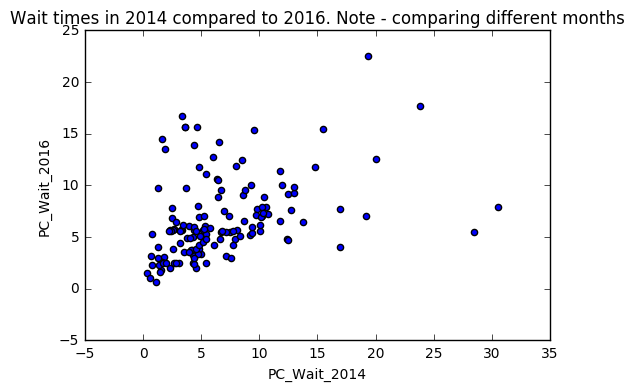

In [267]:
ax = merged_df.plot(kind ='scatter',x='PC_Wait_2014', y ="PC_Wait_2016")
ax.set_title("Wait times in 2014 compared to 2016. Note - comparing different months")

In [266]:
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df["PC_Wait_2014"],merged_df["PC_Wait_2016"])
r_value**2

0.14554234144805411

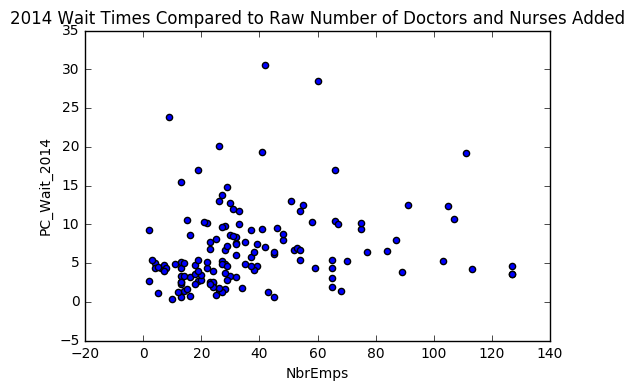

In [209]:
ax = merged_df.plot(kind ='scatter',x='NbrEmps', y ="PC_Wait_2014")
ax.set_title("2014 Wait Times Compared to Raw Number of Doctors and Nurses Added")

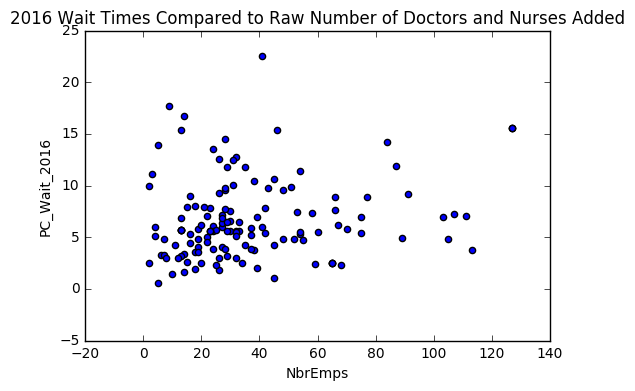

In [211]:
ax = merged_df.plot(kind ='scatter',x='NbrEmps', y ="PC_Wait_2016")
ax.set_title("2016 Wait Times Compared to Raw Number of Doctors and Nurses Added")

In [180]:
merged_df

,Location_x,Appts_Total_2016,PC_Wait_2016,Appts<31_16,%Appts<31_16,VISN,Facility,Is_Station,Station,NbrEmps,...,MAY-FY13,MAY-FY14,MAY-FY15,MAY-FY16,percent_of_staff_14,Location_y,Appts_Total_2014,Appts<31_14,%Appts<31_14,PC_Wait_2014
0,"(V01) (402) Togus, ME","43,609",7.82,"41,785",0.96,01,402,True,402,23,...,1248,1283,1335,1446,0.017927,"(V01) (402) Togus, ME",42899,41740,0.9730,2.51
1,"(V01) (405) White River Junction, VT","21,091",6.09,"20,284",0.96,01,405,True,405,24,...,881,921,1022,1177,0.026059,"(V01) (405) White River Junction, VT",23709,23197,0.9784,3.92
2,"(V01) (518) Bedford, MA","14,456",0.60,"13,366",0.92,01,518,True,518,5,...,1245,1251,1297,1352,0.003997,"(V01) (518) Bedford, MA",8105,7686,0.9483,1.12
3,"(V01) (523) VA Boston HCS, MA","84,373",14.46,"80,635",0.96,01,523,True,523,28,...,4041,4032,4123,4303,0.006944,"(V01) (523) VA Boston HCS, MA",85625,84158,0.9829,1.66
4,"(V01) (608) Manchester, NH","25,424",5.75,"24,384",0.96,01,608,True,608,19,...,691,686,759,803,0.027697,"(V01) (608) Manchester, NH",19511,18996,0.9736,2.66
5,(V01) (631) VA Central Western Massachusetts\rHCS,"28,207",7.88,"26,256",0.93,01,631,True,631,15,...,767,795,803,876,0.018868,(V01) (631) VA Central Western Massachusetts HCS,22602,20510,0.9074,10.54
6,"(V01) (650) Providence, RI","55,615",7.00,"53,872",0.97,01,650,True,650,39,...,1279,1342,1406,1474,0.029061,"(V01) (650) Providence, RI",38893,37289,0.9588,7.40
7,"(V01) (689) VA Connecticut HCS, CT","55,207",1.96,"53,335",0.97,01,689,True,689,18,...,2623,2812,2926,2972,0.006401,"(V01) (689) VA Connecticut HCS, CT",49615,48532,0.9782,2.35
8,"(V02) (528) Albany, NY","41,366",5.72,"38,275",0.93,02,528,True,528,13,...,6566,6678,6751,6735,0.001947,"(V02) (528) Albany, NY",31376,30386,0.9684,2.33
9,"(V02) (528) Albany, NY","41,366",5.72,"38,275",0.93,02,528,True,528,13,...,6566,6678,6751,6735,0.001947,"(V02) (528) Bath, NY",14816,14194,0.9580,3.35


In [181]:
merged_df["Wait_Change"] = merged_df["PC_Wait_2016"] - merged_df["PC_Wait_2014"]

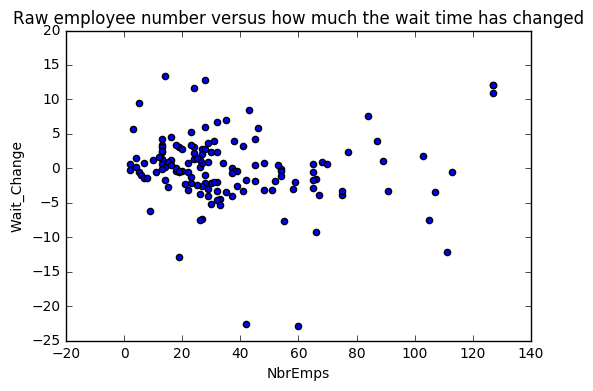

In [258]:
ax = merged_df.plot(kind ='scatter',x='NbrEmps', y ="Wait_Change")
ax.set_title("Raw employee number versus how much the wait time has changed")

In [259]:
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df["PC_Wait_2014"],merged_df["PC_Wait_2016"])

In [260]:
r_value**2

0.14554234144805411

In [185]:
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df["percent_of_staff_14"],merged_df["Wait_Change"])
r_value**2

0.026680641679293401

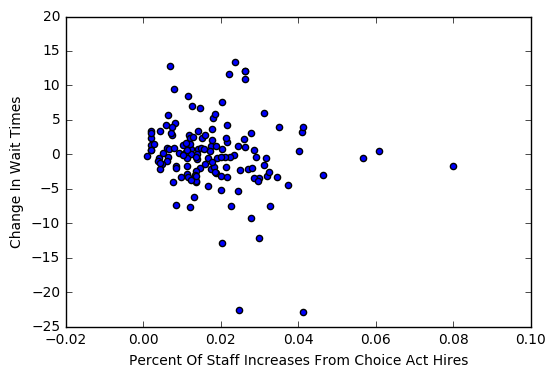

In [306]:
ax = merged_df.plot(kind ='scatter',x='percent_of_staff_14', y ="Wait_Change")
#ax.set_title("adjusted new employees versus how much the wait time has changed")
ax.set_ylabel("Change In Wait Times")
ax.set_xlabel("Percent Of Staff Increases From Choice Act Hires")

In [193]:
merged_df["%Appts>31_16"] = 1 - merged_df["%Appts<31_16"] 
merged_df["%Appts>31_14"] = 1 - merged_df["%Appts<31_14"] 
merged_df["Appts>31_Difference"] = merged_df["%Appts<31_14"] - merged_df["%Appts<31_16"]

In [194]:
merged_df.head()

,Location_x,Appts_Total_2016,PC_Wait_2016,Appts<31_16,%Appts<31_16,VISN,Facility,Is_Station,Station,NbrEmps,...,percent_of_staff_14,Location_y,Appts_Total_2014,Appts<31_14,%Appts<31_14,PC_Wait_2014,Wait_Change,%Appts>31_16,%Appts>31_14,Appts>31_Difference
0,"(V01) (402) Togus, ME","43,609",7.82,"41,785",0.96,01,402,True,402,23,...,0.017927,"(V01) (402) Togus, ME",42899,41740,0.9730,2.51,5.31,0.04,0.0270,0.0130
1,"(V01) (405) White River Junction, VT","21,091",6.09,"20,284",0.96,01,405,True,405,24,...,0.026059,"(V01) (405) White River Junction, VT",23709,23197,0.9784,3.92,2.17,0.04,0.0216,0.0184
2,"(V01) (518) Bedford, MA","14,456",0.60,"13,366",0.92,01,518,True,518,5,...,0.003997,"(V01) (518) Bedford, MA",8105,7686,0.9483,1.12,-0.52,0.08,0.0517,0.0283
3,"(V01) (523) VA Boston HCS, MA","84,373",14.46,"80,635",0.96,01,523,True,523,28,...,0.006944,"(V01) (523) VA Boston HCS, MA",85625,84158,0.9829,1.66,12.80,0.04,0.0171,0.0229
4,"(V01) (608) Manchester, NH","25,424",5.75,"24,384",0.96,01,608,True,608,19,...,0.027697,"(V01) (608) Manchester, NH",19511,18996,0.9736,2.66,3.09,0.04,0.0264,0.0136


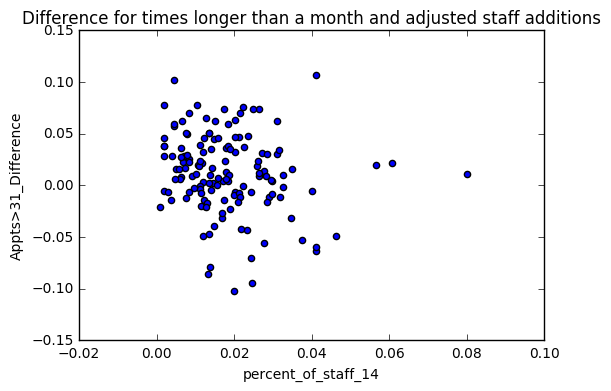

In [215]:
ax = merged_df.plot(kind ='scatter',x='percent_of_staff_14', y ="Appts>31_Difference")
ax.set_title("Difference for times longer than a month and adjusted staff additions")

In [201]:
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df["percent_of_staff_14"],merged_df["Appts>31_Difference"])
r_value**2

0.028908650197052795

In [224]:
merged_df.columns

Index([u'Location_x', u'Appts_Total_2016', u'PC_Wait_2016', u'Appts<31_16',
       u'%Appts<31_16', u'VISN', u'Facility', u'Is_Station', u'Station',
       u'NbrEmps', u'ORGANIZATION', u'MAY-FY11', u'MAY-FY12', u'MAY-FY13',
       u'MAY-FY14', u'MAY-FY15', u'MAY-FY16', u'percent_of_staff_14',
       u'Location_y', u'Appts_Total_2014', u'Appts<31_14', u'%Appts<31_14',
       u'PC_Wait_2014', u'Wait_Change', u'%Appts>31_16', u'%Appts>31_14',
       u'Appts>31_Difference'],
      dtype='object')

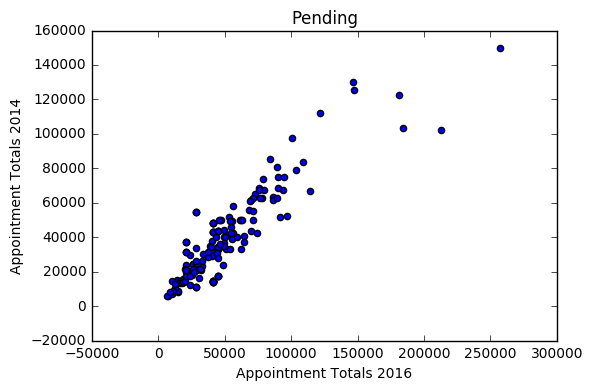

In [364]:
ax = merged_df.plot(kind ='scatter',x='Appts_Total_2016', y ="Appts_Total_2014_x")
ax.set_title("Pending")
ax.set_xlabel("Appointment Totals 2016")
ax.set_ylabel("Appointment Totals 2014")

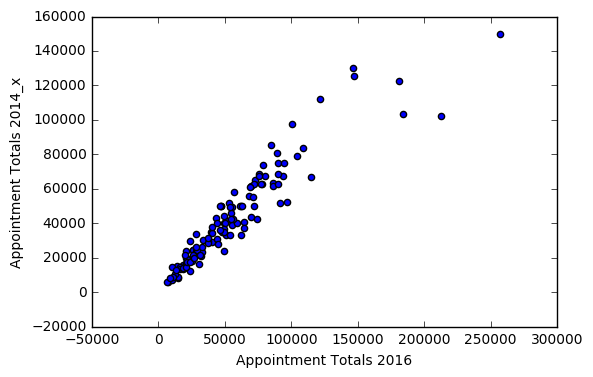

In [357]:
ax = no_dups.plot(kind ='scatter',x='Appts_Total_2016', y ="Appts_Total_2014_x")
ax.set_xlabel("Appointment Totals 2016")
ax.set_ylabel("Appointment Totals 2014_x")

In [356]:
no_dups = merged_df.drop_duplicates("Station",keep=False)

In [361]:
no_dups[["Appts_Total_2014_x","Station","Appts_Total_2016"]]

,Appts_Total_2014_x,Station,Appts_Total_2016
0,42899,402,43609
1,23709,405,21091
2,8105,518,14456
3,85625,523,84373
4,19511,608,25424
5,22602,631,28207
6,38893,650,55615
7,49615,689,55207
33,20917,526,31772
34,40291,561,49662


In [280]:
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df["Appts_Total_2016"],merged_df["Appts_Total_2014"])
r_value**2

0.85690446659522945

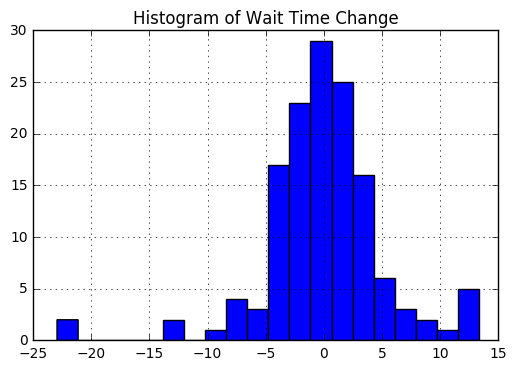

In [278]:
ax = merged_df["Wait_Change"].hist(bins=20)
ax.set_title("Histogram of Wait Time Change")

In [247]:
merged_df["Appts_Increase"] = merged_df["Appts_Total_2016"] - merged_df["Appts_Total_2014"]

In [360]:
no_dups["Appts_Increase"] = no_dups["Appts_Total_2016"] - no_dups["Appts_Total_2014_x"]
no_dups["Appts_Increase"].describe()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


count       124.000000
mean      12518.387097
std       17549.356551
min       -5744.000000
25%        3435.250000
50%        7887.000000
75%       15069.500000
max      110496.000000
Name: Appts_Increase, dtype: float64

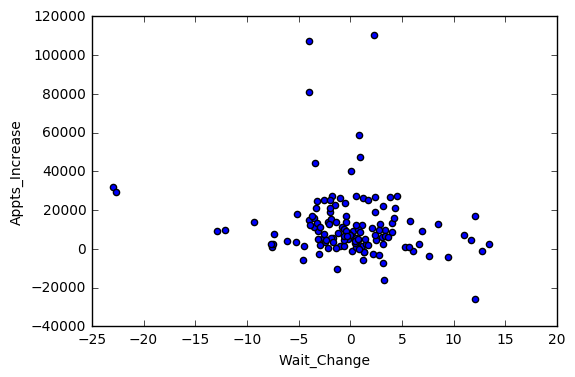

In [268]:
ax = merged_df.plot(kind ='scatter',x='Wait_Change', y ="Appts_Increase")


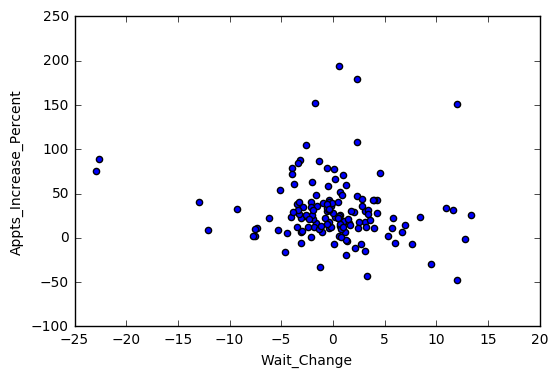

In [284]:
ax = merged_df.plot(kind ='scatter',x='Wait_Change', y ="Appts_Increase_Percent")


In [ ]:
merged_df[(merged_df["Wait_Change"] > 10) & (merged_df["Appts_Increase_Percent"] < -2000)]

In [273]:
merged_df[(merged_df["Wait_Change"] > 10) & (merged_df["Appts_Increase"] < -2000)]

,Location_x,Appts_Total_2016,PC_Wait_2016,Appts<31_16,%Appts<31_16,VISN,Facility,Is_Station,Station,NbrEmps,...,Appts_Total_2014,Appts<31_14,%Appts<31_14,PC_Wait_2014,Wait_Change,%Appts>31_16,%Appts>31_14,Appts>31_Difference,Appts_Increase,Appts_Increase_Percent
85,"(V15) (657) Marion, IL",28290,15.61,"25,830",0.91,15,657,True,657,127,...,54377,53489,0.9837,3.57,12.04,0.09,0.0163,0.0737,-26087,-47.974327


In [250]:
merged_df["Appts_Total_2014"].describe()

count       139.000000
mean      41234.496403
std       27197.049080
min        5982.000000
25%       21320.000000
50%       35052.000000
75%       52247.500000
max      150045.000000
Name: Appts_Total_2014, dtype: float64

In [251]:
old = merged_df["Appts_Total_2014"]
new = merged_df["Appts_Total_2016"]
increase = new - old
merged_df["Appts_Increase_Percent"] = (increase/old)*100

In [256]:
merged_df["Appts_Increase_Percent"].describe()

count    139.000000
mean      30.352312
std       36.177109
min      -47.974327
25%       11.132801
50%       24.798690
75%       40.060666
max      194.189602
Name: Appts_Increase_Percent, dtype: float64

In [257]:
merged_df["Wait_Change"].describe()

count    139.000000
mean      -0.047914
std        5.178290
min      -22.950000
25%       -2.390000
50%       -0.040000
75%        2.370000
max       13.390000
Name: Wait_Change, dtype: float64

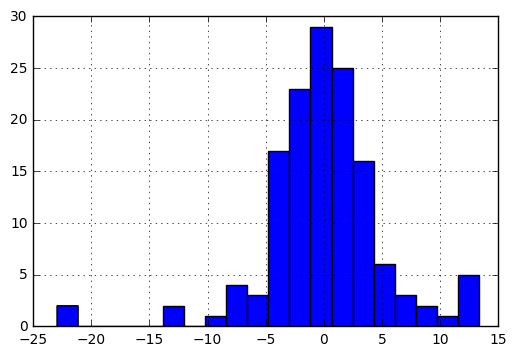

In [308]:
merged_df["Wait_Change"].hist(bins=20)

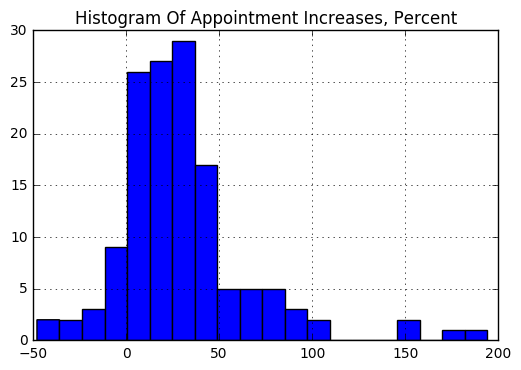

In [312]:
ax = merged_df["Appts_Increase_Percent"].hist(bins=20)
ax.set_title("Histogram Of Appointment Increases, Percent")

In [311]:
merged_df["Appts_Increase_Percent"].describe()

count    139.000000
mean      30.352312
std       36.177109
min      -47.974327
25%       11.132801
50%       24.798690
75%       40.060666
max      194.189602
Name: Appts_Increase_Percent, dtype: float64

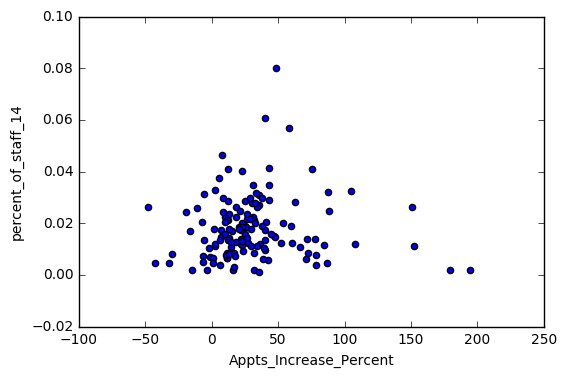

In [313]:
ax = merged_df.plot(kind ='scatter',x='Appts_Increase_Percent', y ="percent_of_staff_14")


In [314]:
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df["Appts_Increase_Percent"],merged_df["percent_of_staff_14"])
r_value**2

0.00053036966677776401

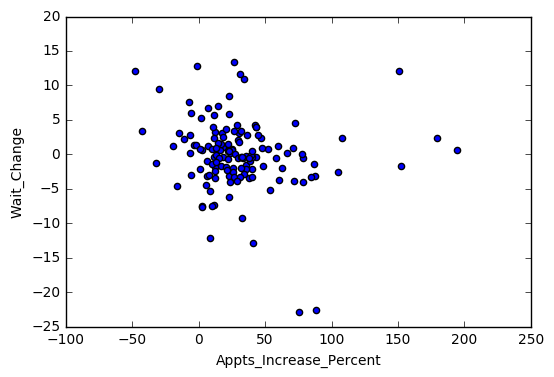

In [304]:
ax = merged_df.plot(kind ='scatter',x='Appts_Increase_Percent', y ="Wait_Change")


In [362]:
merged_df.to_csv("pending.csv")